### Sentiment Analysis Model Comparison

  

#### Models Used

  

1. **Twitter-RoBERTa (CardiffNLP)**

- `cardiffnlp/twitter-roberta-base-sentiment-latest`

- Trained on ~124M English tweets (2018–2021)

- 3-class sentiment: Negative, Neutral, Positive

- Labels: `0 → Negative`, `1 → Neutral`, `2 → Positive`

  

2. **Multilingual BERT (NLP Town)**

- `nlptown/bert-base-multilingual-uncased-sentiment`

- Product reviews in English, Dutch, German, French, Italian, Spanish

- Output: 1 to 5 stars

  
  

3. **DistilBERT SST-2**

- `distilbert-base-uncased-finetuned-sst-2-english`

- Fine-tuned on SST-2 (Stanford Sentiment Treebank)

- Binary classification: Positive / Negative

  

4. **DeBERTa-v3-base MNLI+FEVER+ANLI (MoritzLaurer)**

* `MoritzLaurer/DeBERTa-v3-base-mnli-fever-anli`

* Trained on MultiNLI, FEVER-NLI, ANLI (\~763K pairs)

* Labels: `entailment → positive`, `neutral`, `contradiction → negative`, zero-shot

  

5. **BART Large MNLI (Facebook)**

* `facebook/bart-large-mnli`

* Trained on MultiNLI

* Labels: `entailment → positive`, `neutral`, `contradiction → negative`, zero-shot

In [ ]:
from transformers import pipeline
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

model_1= pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

data = pd.read_csv(
    "/Users/workstation/Desktop/knowledge /university/period_5/vrije-project-TM/data/sentiment-topic-test.tsv",
    sep='\t'
)

# sentence prediction
predictions = []
for sentence in data['sentence']:
    pred = model_1(sentence)[0]['label'].lower()
    predictions.append(pred)

# actual predictions
data['predicted_sentiment'] = predictions

# predicted vs actual data 
y_true = data['sentiment']
y_pred = data['predicted_sentiment']

# Accuracy
acc = accuracy_score(y_true, y_pred)
print(f"\nAccuracy: {acc}\n")

# Precision, Recall, F1, Support
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, digits=3))


cm = confusion_matrix(y_true, y_pred, labels=["positive", "neutral", "negative"])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["positive", "neutral", "negative"],
            yticklabels=["positive", "neutral", "negative"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


Device set to use mps:0



Accuracy: 0.6111111111111112

              precision    recall  f1-score   support

    negative      0.667     0.667     0.667         6
     neutral      0.500     0.333     0.400         6
    positive      0.625     0.833     0.714         6

    accuracy                          0.611        18
   macro avg      0.597     0.611     0.594        18
weighted avg      0.597     0.611     0.594        18



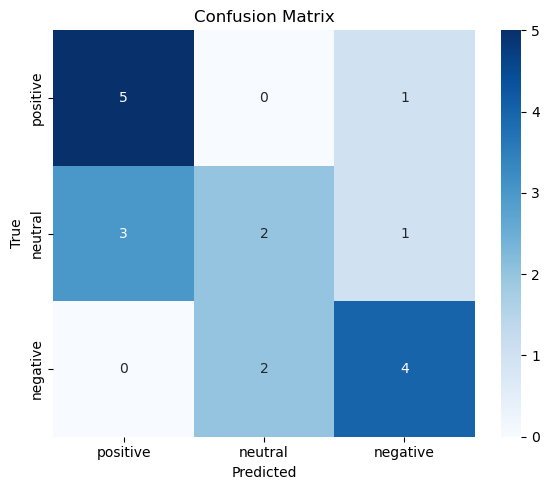

In [1]:
from transformers import pipeline
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# BERT-based model with 1 to 5 star ratinggs 
model_2 = pipeline(
    "sentiment-analysis",
    model="nlptown/bert-base-multilingual-uncased-sentiment"
)  
#loading data
data = pd.read_csv(
    "/Users/workstation/Desktop/knowledge /university/period_5/vrije-project-TM/data/sentiment-topic-test.tsv",
    sep='\t'
)

# Map 1–5 stars → negative / neutral / positive
def star_to_sentiment(label_str: str) -> str:
    stars = int(label_str.split()[0])          # e.g. "1 star" → 1
    if stars <= 2:   # 1–2 stars
        return "negative"
    elif stars == 3: # 3 stars
        return "neutral"
    else:            # 4–5 stars
        return "positive"

#predictions
predictions = [
    star_to_sentiment(model_2(sentence)[0]['label'])
    for sentence in data['sentence']
]

data['predicted_sentiment'] = predictions

#  predictions vs actual labels 
y_true = data['sentiment']
y_pred = data['predicted_sentiment']

print(f"\nAccuracy: {accuracy_score(y_true, y_pred)}\n")
print(classification_report(y_true, y_pred, digits=3))

#plotting 
cm = confusion_matrix(y_true, y_pred, labels=["positive", "neutral", "negative"])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["positive", "neutral", "negative"],
            yticklabels=["positive", "neutral", "negative"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


In [ ]:
from transformers import pipeline
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#loading model 
model_3 = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english",
)

#loading data 
data = pd.read_csv(
    "/Users/workstation/Desktop/knowledge /university/period_5/vrije-project-TM/data/sentiment-topic-test.tsv",
    sep="\t"
)

# sentiment prediction and if confidence is low <30 then classified as neutral (model limitation)
preds = []
for txt in data["sentence"]:
    result = model_3(txt, truncation=True)[0]          # {'label': 'POSITIVE', 'score': 0.97}
    label  = result["label"].lower()                # positive / negative
    score  = result["score"]
    if score < 0.30:
        label = "neutral"
    preds.append(label)

data["predicted_sentiment"] = preds

# plotting
y_true, y_pred = data["sentiment"], data["predicted_sentiment"]

print(f"\nAccuracy: {accuracy_score(y_true, y_pred):.3f}\n")
print(classification_report(y_true, y_pred, digits=3))

cm = confusion_matrix(y_true, y_pred,
                      labels=["positive", "neutral", "negative"])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["positive", "neutral", "negative"],
            yticklabels=["positive", "neutral", "negative"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("DistilBERT SST-2 – Confusion Matrix")
plt.tight_layout()
plt.show()


Device set to use mps:0
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.



Accuracy: 0.8333333333333334

              precision    recall  f1-score   support

    negative      1.000     0.833     0.909         6
     neutral      0.800     0.667     0.727         6
    positive      0.750     1.000     0.857         6

    accuracy                          0.833        18
   macro avg      0.850     0.833     0.831        18
weighted avg      0.850     0.833     0.831        18



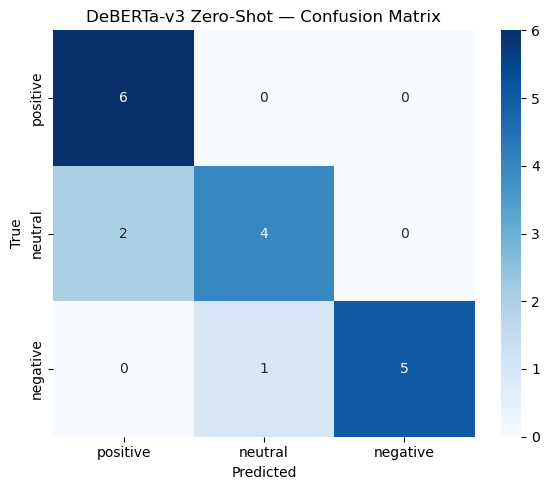

In [2]:
from transformers import pipeline
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#deberta model loading and task assignment 
model_4 = pipeline(
    task="zero-shot-classification", #classifying without having seen them 
    model="MoritzLaurer/DeBERTa-v3-base-mnli-fever-anli",    
)

candidate_labels = ["positive", "neutral", "negative"]

#loading data 
df = pd.read_csv(
    "/Users/workstation/Desktop/knowledge /university/period_5/vrije-project-TM/data/sentiment-topic-test.tsv",
    sep="\t"
)

#predictions 
pred = []
for sent in df["sentence"]:
    res = model_4(sent, candidate_labels)
    pred.append(res["labels"][0].lower())   # top ranking label 

df["predicted_sentiment"] = pred

#metrics 
y_true, y_pred = df["sentiment"], df["predicted_sentiment"]
print(f"\nAccuracy: {accuracy_score(y_true, y_pred)}\n")
print(classification_report(y_true, y_pred, digits=3))

cm = confusion_matrix(y_true, y_pred,
                      labels=["positive", "neutral", "negative"])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["positive", "neutral", "negative"],
            yticklabels=["positive", "neutral", "negative"])
plt.xlabel("Predicted"); plt.ylabel("True")
plt.title("DeBERTa-v3 Zero-Shot — Confusion Matrix")
plt.tight_layout(); plt.show()


Device set to use mps:0



Accuracy: 0.833

              precision    recall  f1-score   support

    negative      0.857     1.000     0.923         6
     neutral      1.000     0.500     0.667         6
    positive      0.750     1.000     0.857         6

    accuracy                          0.833        18
   macro avg      0.869     0.833     0.816        18
weighted avg      0.869     0.833     0.816        18



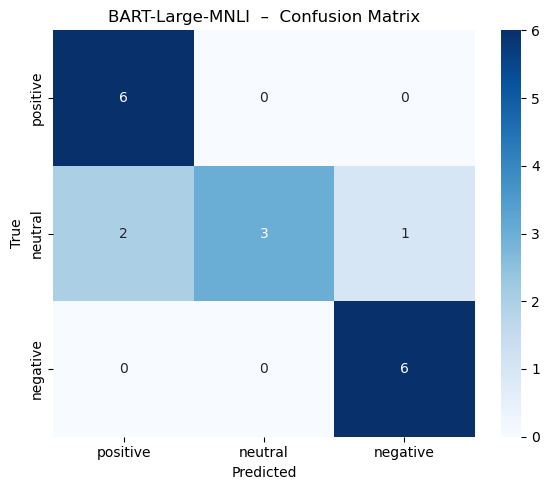

In [3]:
from transformers import pipeline
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# zero shot again with another model
model_5 = pipeline(
    task="zero-shot-classification",
    model="facebook/bart-large-mnli",
)

candidate_labels = ["positive", "neutral", "negative"]
template = "The overall sentiment of the sentence is {}."

#loading data 
path = "/Users/workstation/Desktop/knowledge /university/period_5/vrije-project-TM/data/sentiment-topic-test.tsv"
df = pd.read_csv(path, sep="\t")

#predictions
pred = [
    model_5(sentence, candidate_labels,
        hypothesis_template=template)["labels"][0].lower()
    for sentence in df["sentence"]
]
df["predicted_sentiment"] = pred

# evaluating 
y_true, y_pred = df["sentiment"], df["predicted_sentiment"]

print(f"\nAccuracy: {accuracy_score(y_true, y_pred):.3f}\n")
print(classification_report(y_true, y_pred, digits=3))

cm = confusion_matrix(y_true, y_pred,
                      labels=["positive", "neutral", "negative"])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["positive", "neutral", "negative"],
            yticklabels=["positive", "neutral", "negative"])
plt.xlabel("Predicted"); plt.ylabel("True")
plt.title("BART-Large-MNLI  –  Confusion Matrix")
plt.tight_layout(); plt.show()
